# Coursework 2

### Deadline: 16th December 2019, 4pm
### Submission format
Solve all the question directly in this notebook. Some tasks require writing and running code. Other times you are asked to write answers to questions within the 'Markdown' cells and the answers are propmted by  __Answer:__. 

Submit the solved Jupyter notebooks with the code and answers to KEATS. Make sure that all your code is running.You do not need to submit the data files with your notebooks. Your submission should consists of a single solved Python notebook file named  __CW2_Surname_Forname.ipynb__. 

Marks obtained in this coursework will be converted to __25% of your final grade__.

Any questions about the coursework should be sent to maria.murgasova@kcl.ac.uk

# Question 1

**[Total: 30 marks]**

### Breast cancer dataset

The breast cancer dataset is available in `sklearn` and can be loaded and explored using the code below:

In [1]:
from sklearn import datasets

data = datasets.load_breast_cancer()

print(data.keys())
print('\n Features: \n', data.feature_names)
print('\n Labels: ', data.target_names)


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

 Features: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Labels:  ['malignant' 'benign']


In the code below we create our usual `Features` and `Labels` that are `numpy` arrays and scale the features using `StandardScaler`

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

Features = StandardScaler().fit_transform(data.data)
Labels = data.target

print('Features dim: ', Features.shape)
print('Labels dim: ', Labels.shape)
print('We have {} samples and {} features.'.format(Features.shape[0],Features.shape[1]))

Features dim:  (569, 30)
Labels dim:  (569,)
We have 569 samples and 30 features.


### Explore structure of the data

**Task 1.1 [3 marks]**: Use PCA to reduce the features to two dimensions and plot the reduced data highlighting the labels. To improve visualisation, make the points in the plots transparent by setting `alpha` to 0.5. Are there clear clusters in the data?

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Perform PCA
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
principalComponents=pca.fit_transform(Features)
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['PC1', 'PC2'])
#PCA_data = np.append(principalDf, Labels[:,np.newaxis],axis=1)    keeping in np.array
PCA_data = pd.concat([principalDf,pd.DataFrame({'Labels':Labels})], axis =1)
# Plot reduced data

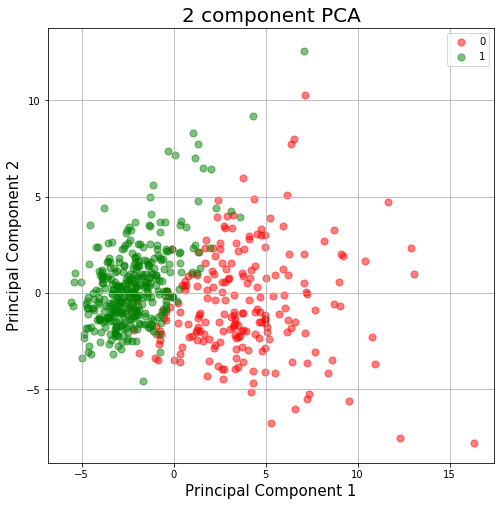

In [4]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = PCA_data['Labels'] == target
    ax.scatter(PCA_data.loc[indicesToKeep, 'PC1']
               , PCA_data.loc[indicesToKeep, 'PC2']
               , c = color
               , alpha = 0.5
               , s = 50)
ax.legend(targets)
ax.grid()


__Answer:__

## While we can generally see two clusters, they are not distinct and have significant overlap

### Random forest classification

**Task 1.2 [4 marks]:** Perform classification using Random Forest and calculate cross-validated accuracy. Extract and display the two most important features, including their names and importance values.

In [88]:
# Fit and evaluate a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
 
# Select and fit the model
model = RandomForestClassifier(n_estimators=2)
model.fit(Features,Labels)

# Calculate CV RMSE
scores = cross_val_score(model, Features, Labels, cv=10, scoring = 'neg_mean_squared_error')
print('Cross-validated RMSE is ', round(np.sqrt(-scores.mean()),2))

Cross-validated RMSE is  0.29


In [89]:
# Identify and print the two most important features

ind = np.argpartition(model.feature_importances_,-2)[-2:]
print(data.feature_names[ind])

['worst area' 'mean concave points']


**Task 1.3 [6 marks]:** Visualise the results of the random forest classification. Perform following steps:
* Perform PCA to reduce features to two dimensions
* Calculate the 2D feature range for the reduced features
* Predict the classification result for the 2D feature range and plot using `contourf`. *Hint: you will need to look up a method* `PCA.inverse_transform` *in sklearn help to predict the labels for the 2D feature range.*
* Plot the reduced data with the labels highlighted on the same plot.

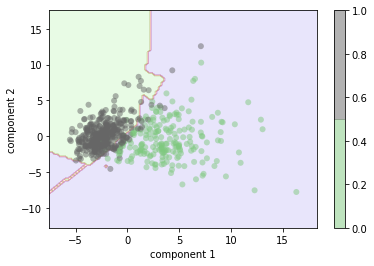

In [106]:
# Transform features using PCA
pca = PCA(n_components =2)
PCA_reduced=pca.fit_transform(Features)

# Generate feature space
x1 = np.linspace(principalComponents[:,0].min()-2, principalComponents[:,0].max()+2,100)
x2 = np.linspace(principalComponents[:,1].min()-5, principalComponents[:,1].max()+5,100)
x1,x2 = np.meshgrid(x1,x2)
Feature_space = np.c_[x1.ravel(), x2.ravel()]


# Predict and plot labels for the features space
y = model.predict(pca.inverse_transform(Feature_space)).reshape(x1.shape)
plt.contourf(x1,x2,y,cmap=plt.cm.brg,alpha = 0.1)

# Plot reduced data
plt.scatter(PCA_reduced[:, 0], PCA_reduced[:, 1],
            c=data.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Neural network classification
**Task 1.4  [4 marks]**: Neural Network has been trained and it was found that multi-layer perceptron with two hidden layers with `3` and `2` nodes and L2 norm regularisation parameter `1` result in optimal performance. Train the network with these parameters, calculate cross-validated accuracy and visualise the decision boundary as in Task 1.3.

Accuracy: 0.91 (+/- 0.11)


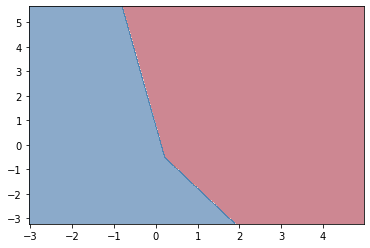

In [132]:
# Select and train the model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(3, 2), random_state=1)

mlp.fit(Features[:,0:2], Labels) #should i be subscripting the Featuresdataset

# Calculate CV accuracy
scores = cross_val_score(mlp, Features, Labels, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Plot result

x1 = np.linspace(Features[:,0].min()-1, Features[:,0].max()+1,1000)
x2 = np.linspace(Features[:,1].min()-1, Features[:,1].max()+1,1000)
x1,x2 = np.meshgrid(x1,x2)
Feature_space = np.c_[x1.ravel(), x2.ravel()]

labels = mlp.predict(Feature_space)
z = labels.reshape(x1.shape)
fig,ax = plt.subplots()
ax.contourf(x1,x2,z,cmap='RdBu',alpha = 0.5)

**Task 1.5: [4 marks]** Visualise the coefficients of all the layers using `bar` plots. Print out number of coefficients in each layer.

<BarContainer object of 50 artists>

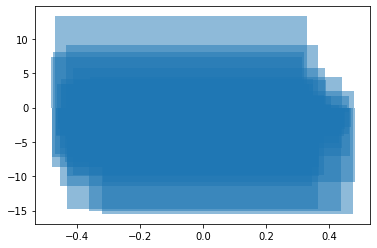

In [154]:
test = mlp.coefs_[0]

plt.bar(test[0],sum(test[1:]),align='center', alpha=0.5)

# WTF does this mean

### Feature selection
**Task 1.6 [9 marks]**: You are asked to develop a simple test for detection of breast cancer that could be used in clinical practice. The requirements are 
* There should be as few measurements as possible
* The method for prediction of breast cancer should be as simple as possible.
* Accuracy needs to be as high as possible.

Using feature selection methods that were covered in the lectures find the smallest number of features for predictions while preserving the accuracy as much as possible. Develop a test by training a linear classifier. Display the results of the classification, including the decision boundary, to visually assess the test. Print out the names of the selected features.

Decribe your new test and how you arrived at the solution. Explain why this new test is suitable. Keep your description brief.

*Hint: When reducing number of features don't look for highest performance, but rather smallest number of features for which performance does not drop significantly*

__Answer:__

# Question 2

**[Total: 20 marks]**

### Brain MRI

The code below loads two images - T1 and T2 weighted MRI. In this question you will implement 2D Gaussian Mixture Model for segmentation of this multi-channel MRI.

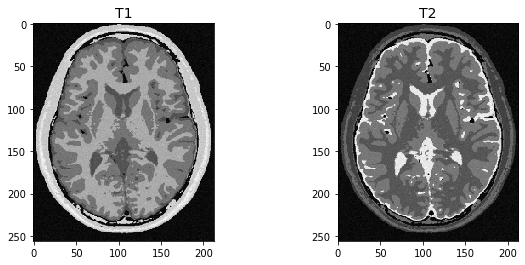

In [156]:
# load  images 
T1 = plt.imread('T1.png')
T2 = plt.imread('T2.png')

# display images
plt.figure(figsize = [10,4])
plt.set_cmap('gray')
plt.subplot(121)
plt.imshow(T1)
plt.title('T1', fontsize = 14)
plt.subplot(122)
plt.title('T2', fontsize = 14)
plt.imshow(T2)

**Task 2.1: [2 marks]** Calculate and plot 2D histogram of the multi-channel MRI. *Hint: matplotlib package has a suitable function*

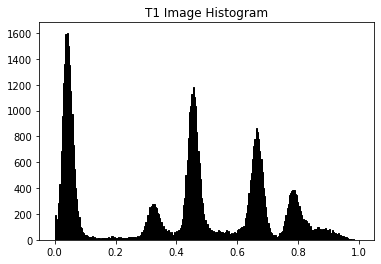

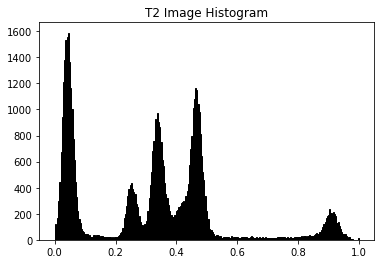

In [157]:
plt.hist(T1.ravel(), bins=256, range=(0.0,1.0),fc='k',ec='k')
plt.title("T1 Image Histogram")
plt.show()

plt.hist(T2.ravel(), bins=256, range=(0.0,1.0),fc='k',ec='k')
plt.title("T2 Image Histogram")
plt.show()

### GMM segmentation
**Task 2.2 [6 marks]:** Given the histogram above, decide how many clusters you need to segment the image. Perform GMM clustering using 2D feature space composed of these two images. Display the segmentation. Decide whether the segmentation worked by visual assessment.

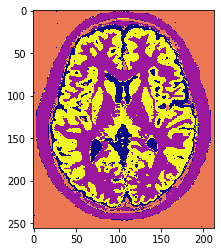

In [158]:
# Select model
from sklearn.mixture import GaussianMixture
model=GaussianMixture(n_components=4)

# Create feature matrix
T1features2D = T1.reshape(-1,1)

# Fit and predict
model.fit(T1features2D)
predicted_labels=model.predict(T1features2D)

# Display segmentation
plt.imshow(predicted_labels.reshape(256,213)) #256 by 213 is T1 shape
plt.set_cmap('plasma')

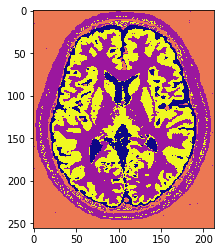

In [159]:
# Select model
from sklearn.mixture import GaussianMixture
model=GaussianMixture(n_components=4)

# Create feature matrix
T2features2D = T2.reshape(-1,1)

# Fit and predict
model.fit(T2features2D)
predicted_labels=model.predict(T2features2D)

# Display segmentation
plt.imshow(predicted_labels.reshape(256,213)) #256 by 213 is T2 shape
plt.set_cmap('plasma')

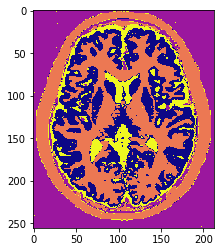

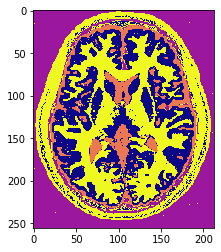

In [179]:
test1 = np.concatenate((T1features2D,T2features2D),axis=0)

from sklearn.mixture import GaussianMixture
modela=GaussianMixture(n_components=4)
modela.fit(test1)
plt.imshow(modela.predict(T1features2D).reshape(256,213))
plt.set_cmap('plasma')
plt.show()
plt.imshow(modela.predict(T2features2D).reshape(256,213))
plt.set_cmap('plasma')

**Task 2.3: [6 marks]** Predict and display posterior probability maps for all classes. Create a plot with as many subplots as classes and display one posterior probability map in each. 
# Display a title with the name of the tissue represented by that propability map.

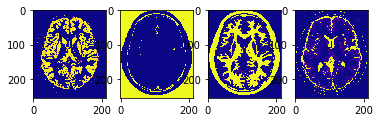

In [184]:
# Predict probabilistic segmentations
proba_T1 = modela.predict_proba(T1features2D)

# Plot all probability maps
for i in range(proba_T1.shape[1]):
    # take only posteriors for class i
    post = proba_T1[:,i]

    # reshape to the 3D image
    post2D = post.reshape(256,213)
    
    # display
    plt.subplot(1,proba_T1.shape[1],i+1)
    plt.imshow(post2D)

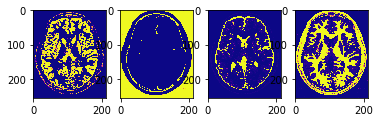

In [186]:
# Predict probabilistic segmentations
proba_T2 = modela.predict_proba(T2features2D)

# Plot all probability maps
for i in range(proba_T2.shape[1]):
    # take only posteriors for class i
    post = proba_T2[:,i]

    # reshape to the 3D image
    post2D = post.reshape(256,213)
    
    # display
    plt.subplot(1,proba_T2.shape[1],i+1)
    plt.imshow(post2D)

**Task 2.4 [6 marks]**: Predict likelihood function $p(y|\phi)$ for the intensity ranges of the two images. Display the likelihood next to the histogram (in a figure with two subplots) and compare. Is that what you expected? Try to reason why the likelihood might differ from the histogram. Which classes had PDFs with behaviour that was not expected?

In [188]:
int_range = np.linspace(0,np.max(T1),200)
proba_curves = model.predict_proba(int_range.reshape(-1,1))

<function matplotlib.pyplot.show(*args, **kw)>

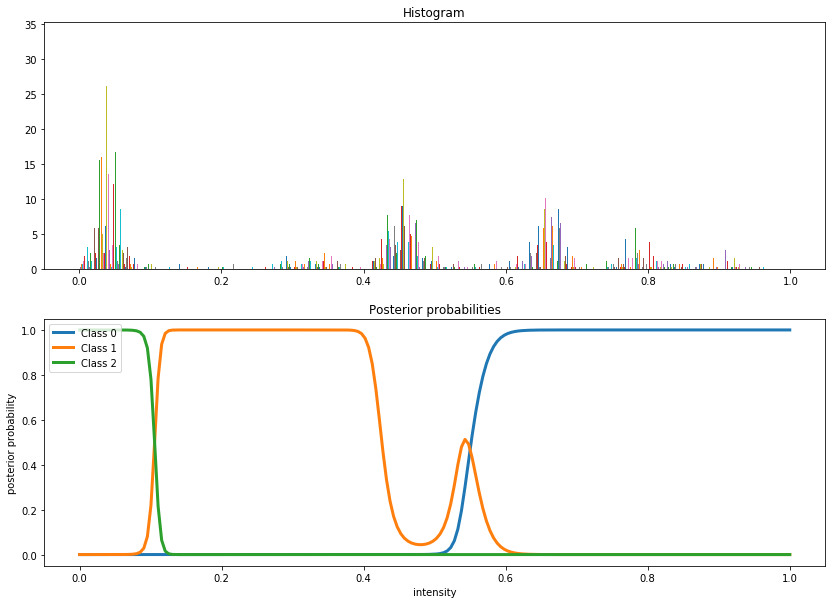

In [193]:
# display
plt.figure(figsize = [14,10])
# plot histogram
plt.subplot(211)
h2 = plt.hist(T1, bins = 100, density = True)
plt.title('Histogram')


# plot posterior probabilities
plt.subplot(212)
plt.title('Posterior probabilities')
plt.xlabel('intensity')
plt.ylabel('posterior probability')
for i in range(0,3):
    plt.plot(int_range,proba_curves[:,i], linewidth = 3, label = 'Class {}'.format(i))
plt.legend(loc = 'upper left')

plt.show

__Answer:__
## <font color='red'> FINISH THIS </font>

# Question 3

**[Total: 20 marks]**

## Random forest from scratch

In the lectures we created our own Decision Tree and Bagging classification methods which we implemented in `DecisionTree.py` and `Bagging.py`. Random forest performs bootstrapping and aggregation just like bagging, but on top of that it also performs random selection of features at each node in the decision tree. In this question you will extend the Decision Tree and Bagging functions to create your own Random Forest.

**Task 3.1 [2 marks]**  In the box below write what is the effect selecting a random subset of features at each node in terms of reducing the bias or variance of the model and why.

__Answer:__ 
## <font color='red'> FINISH THIS </font>

smth smth ensemble learning is effective among uncorrelated testing

### Getting started

The first thing we need to do is import our original `DecisionTree` and `Bagging` modules. We can call the functions from these imported modules using the ```DT.``` or ```BG.``` syntax. Run the code bellow to import the modules.

In [96]:
import DecisionTree as DT
import Bagging as BG
import numpy as np
import sys

Training and testing random forests behaves very similarly to that of bagged ensembles of decision trees, with the exception that when optimising for the best split of the data at each node in function `get_best_split`, only a subset of the features is considered. To do that we will write a new fuction `get_feature_subset` where the maximum proportion of features each node is controlled by the variable `max_f`. 

We will also need to modify several other functions to support the new functionality. The functions that don't need to be modified can be called directly from the imported modules using `DT.` and `BG.` Think very carefully which versions of the functions you need to use to avoid mistakes and loosing marks.

### Dataset

We will test the new functions on the simulated classification dataset. We will create a two-class problem, creating a dataset with 1000 samples and 10 features, of which 3 will be informative (necessary for the classification) and none redundant. Run the code bellow to create the dataset.

More info on the simulated dataset here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

In [97]:
import sklearn.datasets as datasets 

# Build a classification task using 3 informative features
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=2)

print('Number of samples: ', X.shape[0])
print('Number of features: ', X.shape[1])
print('Size of the label vector: ', y.shape)

Number of samples:  1000
Number of features:  10
Size of the label vector:  (1000,)


### Select subsets of features

**Task 3.2 [4 marks]:** Write a function `get_feature_subset` which, given a number of features `n_features` and the proportion of features to be sampled `max_f`, will return an array `indices`, indicating which features have been selected. This is achieved by random sampling *without replacement*. Complete the code bellow to do that.

In [108]:
# Complete the code for the function
import random
def get_feature_subset(n_features,max_f):
    """       
        Returns indices of a random subset of features
        input:
            n_features: number of features
            max_f: the proportion of features available for each node
                             
        output:
            indices: list of selected features 
    """
    
    # calculate the number of selected features (we were given a proportion of all features)
    n_selected = int(max_f * n_features)
    # generate indices of randomly selected features (without replacement)
    indices = random.sample(range(n_features+1),n_selected)
     
    return np.array(indices)

# Test function
ind = get_feature_subset(X.shape[1],0.3)
print(ind)

[ 6  3 10]


### Update get_best_split

**Task 3.3 [4 marks]**:  Now edit function ```get_best_split``` below to:
1. Call `get_feature_subset` and have it return a random subset features with proportion `max_f`, but only if `max_f` is less than 1.0
2. Edit the outer loop (variable `index`) such that it loops only over this subset of features

In [116]:
def get_best_split(dataset, max_f=1.0):
    """
        Search through all attributes and all possible thresholds to find the best split for the data
        input:
            dataset = array (n_samples,n_features+1) 
                    rows are examples 
                    last column indicates class membership
                    remaining columns reflect features/attributes of data
            max_f: the proportion of features available for each node
                             
        output:
            dict containing: 1) 'index' : index of feature used for splittling on
                             2)  'value': value of threshold split on
                             3) 'branches': tuple of data arrays reflecting the optimal split into left and right branches       
    """
    # Extract number of features
    n_features = dataset.shape[1]-1

#### AMEND CODE HERE ###
    # get random feature indices
    if max_f < 1.0:
        features = get_feature_subset(n_features,max_f) 
    else:
        features=np.arange(n_features)
    #print('Selected features:', features)
        
    # identify which labels we have
    class_values=np.unique(dataset[:,-1])
    
    # initalise optimal values prior to refinment
    best_cost=sys.float_info.max # initialise to max float
    best_value=sys.float_info.max # initialise to max float
    best_index=dataset.shape[1]+1 # initialise as greater than total number of features
    best_split=tuple() # the best_split variable should contain the output of test_split that corresponds to the optimal cost

    
#### AMEND CODE HERE ###
    # iterate over all selected features/attributes (columns of dataset)
    for index in features: 
        # Trialling splits defined by each row value for this attribute
        for r_index,row in enumerate(dataset):
            branches=DT.test_split(index, row[index], dataset)
            cost=DT.split_cost(branches,class_values)
            if cost < best_cost:
                best_cost=cost
                best_split=branches
                best_index=index
                best_value=row[index]

                
    return {'index':best_index, 'value':best_value, 'branches':best_split}

# Test function
dataset = np.concatenate([X,y.reshape(-1,1)],axis=1)
ans = get_best_split(dataset, 0.3)
print('Best index: ',ans['index'])
print('Best value: ',round(ans['value'],2))

Best index:  10
Best value:  1.0


In [118]:
# Create a terminal node value
def to_terminal(group):
    
    """
        Assigns a label according to the most common class label of the data
        input:
            group = array (n_samples,n_features+1) 
                    rows are examples 
                    last column indicates class membership
                    remaining columns reflect features/attributes of data
                             
        output:
            class label for this terminal node
    """
    
    # set outcomes equal to the final column of the input array  
    # - as this indicates the labels of the training data 
    outcomes = group[:,-1]
    counts = np.bincount(outcomes.astype(int).clip(min=0))
    most_common_class=np.argmax(counts)
    return most_common_class

## .clip(min=0) was added by me as np.bincount couldn't take negative values - this fucks up the tree thing majorly but just tryna finish the assessment

### Update remaining functions

Now we need to make sure that the argument `max_f` is passed to all functions that need it. Bellow is the updated function `run_split`. Run the code.

In [119]:
def run_split(node, max_depth, min_size, depth, max_f=1):
     
    """
        Recursively splits nodes until termination criterion is met
        input:
            node = dict containing: 1) 'index' : index of feature used for splittling on
                             2)  'value': value of threshold split on
                             3) 'branches': tuple of data arrays reflecting the optimal split into left and right branches
            max_depth: int determining max allowable depth for the tree
            min_size : int determining minimum number of examples allowed for any branch
            depth: current depth of tree 
            max_f: the proportion of features available for each node            
            
            
        Output:
            node: is returned by value and returns a recursion of dicts representing the structure of the whole tree
    """
    left, right = node['branches']
    del(node['branches'])
    # check for whether all data has been assigned to one branch; if so assign both branches the same label
    if left.shape[0]==0 :
        node['left'] = node['right'] = to_terminal(right) #DT.to_terminal(right)       
        return
    if right.shape[0]==0 :
        node['left'] = node['right'] = to_terminal(left)#DT.to_terminal(left)       
        return
    # check for max depth; if exceeded then estimate labels for both branches
    if max_depth != None and depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)#DT.to_terminal(left), DT.to_terminal(right)
        return
    # process left child
        # in first instance check whether the number of examples reaching the left node are less than the allowed limit
        # if so assign as a terminal node, if not then split again
    if len(left) <= min_size:
        node['left'] = to_terminal(left)#DT.to_terminal(left)
    else:
        node['left'] = get_best_split(left,max_f)
        run_split(node['left'], max_depth, min_size, depth+1,max_f)
    
    # process right child as for left
    if len(right) <= min_size:
        node['right'] = to_terminal(right)#DT.to_terminal(right)
    else:
        node['right'] = get_best_split(right,max_f)
        run_split(node['right'], max_depth, min_size, depth+1,max_f)

**Task 3.4 [ 3 marks]**: Your task is now to edit the function `build_tree`  
* to include an optional parameter `max_f`, which allows the user to define a maximum proportion of features to be sampled from at each node

* to supply `max_f` to all functions which call `get_best_split` (including itself). 

Edit each line of code where this is the case.

In [120]:
def build_tree(train, max_depth=None, min_size=1,max_f=1.0):
    """
    Builds and returns final decision tree
    
    input:
        train : training data array (n_samples,n_features+1)
        max_depth: user defined max tree depth (int)
        min_size: user defined minimum number of examples per tree tree depth (int)
        max_f: the proportion of features available for each node  
    """
    # create a root node split by calling get_best_split on the full training set
    root = get_best_split(train,max_f) 
    # now build the tree using run_split
    run_split(root, max_depth, min_size,1, max_f) 
    return root

### Create a Forest

Now what remains is to create our forest of trees. 

Random Forests are exactly the same as bagging _EXCEPT_ that as well as creating bootstrapped samples of examples from the dataset they also randomly sample subsets of features at each node. This means we can continue to use the functions we built for our `Bagging` method but with small edits to ensure that they pass the user defined parameter `max_f` to our new `DecisionTree` functions

**Task 3.5 [2 mark]** Edit function `create_bagged_ensemble` to support the new user defined argument `max_f`

*Hint:* here you will need to call the build_tree function you defined above.

In [122]:
def create_bagged_ensemble(data, max_depth, min_size, max_f, n_trees, random_state=42): # 1 mark
    
    ''' Create a bagged ensemble of decision trees
    input:
        data: (n_samples,n_features+1) data array
        max_depth: max depth of trees
        min_size: minimum number of samples allowed in tree leaf nodes
        max_f: user defined arg
        n_trees: total number of trees in the ensemble
        random_state: fixes random seed
    output:
        bagged_ensemble: list of decision trees that make up the bagged ensemble
    '''
    
    bagged_ensemble=[]
    for i in range(n_trees):
        print('building tree', i)
        sample = BG.bootstrap_sample(data, random_state)
        tree = build_tree(sample,max_depth,min_size,max_f)
        bagged_ensemble.append(tree)
    
    return bagged_ensemble

### Evaluate

The code bellow creates a training and test dataset. Run the code.

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dataset_train=np.concatenate((X_train,np.expand_dims(y_train,axis=1)),axis=1)
dataset_test=np.concatenate((X_test,np.expand_dims(y_test,axis=1)),axis=1)

We will now evaluate the performance of our new Random Forest and compare it to the performance of a single decision tree. To calculate accuracy, we will predict the labels of the test set using the unchanged funcions `predict` that are already implemented in `Bagging` and `DecisionTree` modules.

**Task 3.6 [ 2 marks]**  Build a single decision tree using your newly implemented function and set the parameters as `max_depth=3`, `min_size=1`, `max_f=1.0`. Report the accuracy on the test set. 

In [121]:
# Build the tree
tree = build_tree(X_train,3,1,1.0)

# Predict on test set
predictions = DT.predict(tree,X_test)

# Calculate and print accuracy
print('Accuracy:', round(DT.score(y_test,predictions),2))

Accuracy: 0.48


**Task 3.7 [ 3 marks]**  Build and train your newly implemeted Random Forest with parameters `max_depth=3`, `min_size=1`, `max_f=0.3`, n_trees=10. Report the accuracy on the test set. 

Note: This might take a while to run.

In [123]:
# Build the forest
forest = create_bagged_ensemble(X_train, 3,1,0.3,10)

# Predict on test set
rf_predictions = BG.bagging_predict(forest,X_test)

# Calculate and print accuracy
print('Our Bagging Score', DT.score(y_test,rf_predictions))

building tree 0
building tree 1
building tree 2
building tree 3
building tree 4
building tree 5
building tree 6
building tree 7
building tree 8
building tree 9


# Question 4

**[Total: 20 marks]**

## Detecting cancer from histopatological images
In this question we will apply feature extractors to classify histopatological images for presence of cancer. More details about the PatchCamelyon dataset can be found here https://github.com/basveeling/pcam.
<img src="https://github.com/burtonye/ML_Coursework2/blob/master/pcam.jpg?raw=1" style="max-width:100%; width: 100%; max-width: none">

### Load the dataset

Run the code bellow to load the dataset from the file `histological_data.npz`.

In [196]:
# Load dataset from .npz file
data = np.load('histological_data.npz')

# Train images and labels
X_train = data['X_train']
y_train = data['y_train']

# Test images and labels
X_test  = data['X_test']
y_test  = data['y_test']

# Print shapes here
print('Training data - images:', X_train.shape)
print('Training data - labels:',y_train.shape)
print('Test data - images:',X_test.shape)
print('Test data - labels:',y_test.shape)

Training data - images: (1500, 96, 96)
Training data - labels: (1500,)
Test data - images: (150, 96, 96)
Test data - labels: (150,)


Let's now plot a few example images

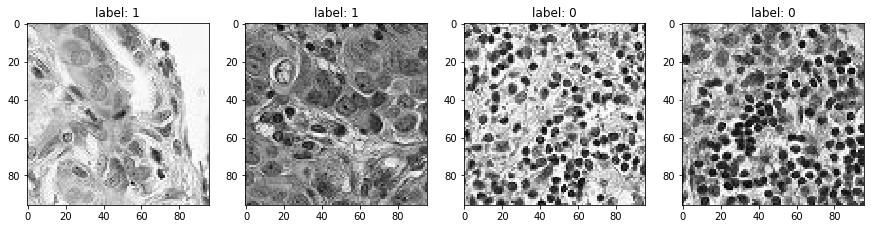

In [197]:
id_images = [4, 5, 6, 7]

plt.figure(figsize=(15, 8))
for i in np.arange(0, 4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[id_images[i], :, :], cmap='gray')
    plt.title('label: ' + str(y_train[id_images[i]]))

### Feature extraction

In the lectures we have seen a number of feature extractors that are available at `skimage`, including `daisy`. Bellow is an example of feature extraction using daisy. Use the code bellow to experiment with the parameters.

Feature vector shape daisy:  (3, 3, 136)


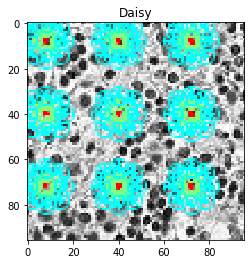

In [219]:
from skimage.feature import daisy

# example image
img = X_train[id_images[2], :, :]

# example feature extraction using daisy
features_daisy, visualisation_daisy = daisy(img, step=32, radius=8, rings=2, histograms=8, orientations=8, visualize=True)
plt.imshow(visualisation_daisy)
plt.title('Daisy')
# Extracted features
print('Feature vector shape daisy: ', features_daisy.shape)

**Task 4.1 [4 marks]:** In the function bellow implement a feature extractor using `daisy`. The function should accepts a 2D image and return a vector of features. Don't forget to make sure that the feature vector is flattened to 1 dimension. You can start with the parameter setting given above, but you will change the parameters later on.

In [220]:
def my_feature_extractor(image):
    f,v = daisy(img, step=32, radius=8, rings=2, histograms=8, orientations=8, visualize=True)
    return f.flatten

Run the code bellow to perform feature extraction for the whole dataset. It will take a while for it to finish.

In [221]:
# Perform feature extraction on the train/test set

# Create empty arrays
X_train_features = []
X_test_features  = []

# Go through all the images, perform feature extraction and then append them to the list
for img in X_train:
    X_train_features.append(my_feature_extractor(img))
for img in X_test:
    X_test_features.append(my_feature_extractor(img))
    
# Make the lists back into numpy arrays
X_train_features = np.asarray(X_train_features)
X_test_features  = np.asarray(X_test_features)

# Print dimensions
print('Feature matrix train: ', X_train_features.shape)
print('Feature matrix test: ', X_test_features.shape)

Feature matrix train:  (1500,)
Feature matrix test:  (150,)


__Task 4.2 [4 marks]:__ In the box bellow explain the meaning of the dimensions of the two matrices, printed by the code in the cell above.

__Answer:__ 

__Task 4.3 [8 marks]:__ Bellow you are given a function `PerformanceMeasures` to calculate the performance of a classifier. Furthermore, the features of the training set have been scaled using the `StandardScaler`. You are also given a `RandomForestClassifier` model with parameter `min_samples_leaf = 50` to prevent overfitting due to a large number of extracted features. Complete the code bellow to
* fit the `RandomForestClassifier` model to the training data
* calculate the performance measures on the training set to spot overfitting
* calculate the performance measures on the test set to evaluate performance

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

def PerformanceMeasures(model,Features,Labels):
    Labels_predicted = model.predict(Features)
    tn, fp, fn, tp = confusion_matrix(Labels, Labels_predicted).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    specificity = tn/(tn+fp)
    sensitivity = tp/(tp+fn)
    precision = tp/(tp+fp)
    print('Accuracy: ', round(accuracy,2))
    print('Sensitivity: ', round(sensitivity,2))
    print('Specificity: ', round(specificity,2))
    print('Precision: ', round(precision,2))


Features = StandardScaler().fit_transform(X_train_features)
Labels = y_train

# Fit and evaluate a random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, min_samples_leaf = 50) 

# fit the model

# Calculate performance measures on training set
print('Training set:')

# Calculate performance measures on test set
print('Test set:')


__Task 4.4 [4 marks]:__ Try to improve the performance of your classifier by changing the parameters of the feature extractor in the function `my_feature_extractor`. Once you have decided on your favourite parameters, comment on the performance of the classifier in the box bellow.

__Answer:__ 